# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import scipy
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of body temperatures normal?

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
temp = df['temperature'].sort_values()
#temp.head()

In [4]:
mean, std = np.mean(temp),np.std(temp)
print('Mean: ' + str(mean) + '    Standard Deviation: ' + str(std))

Mean: 98.24923076923076    Standard Deviation: 0.7303577789050376


In [5]:
temp_pdf = norm.pdf(temp, mean, std)

In [6]:
x = np.arange(96.0, 101.0, 0.25)
bins = np.arange(temp.min(), temp.max(), 0.05)

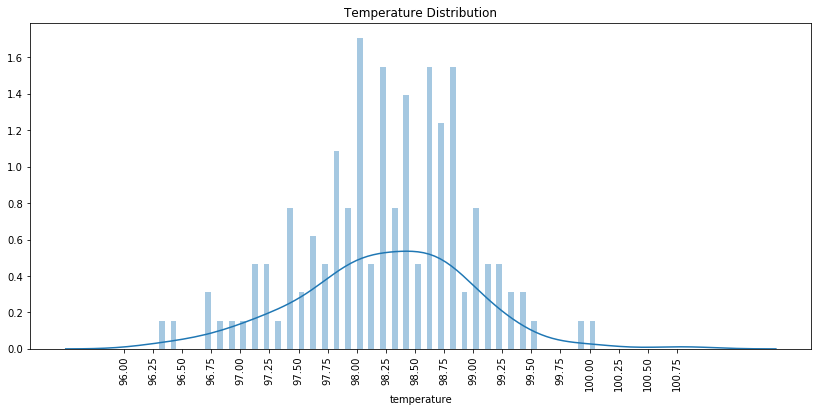

p-value = 0.258747986349


In [7]:
plt.figure(figsize = (14,6))
sns.distplot(temp, bins = bins)
plt.xticks(x, rotation = 'vertical')
plt.title('Temperature Distribution')
plt.show()
statistic, pvalue = stats.normaltest(temp)
print('p-value = ' + str(pvalue))

In [8]:
if pvalue < 0.05:
    print('Not a Normal Distribution')
else :
    print('Normal Distribution')

Normal Distribution


In order to check if the distribution of temperature is normal, it is best to visualize it first. So, first we plotted a histogram of all temperatures along with the pdf. Visually it appears to be normally distributed.

Later we used the normaltest from scipy and observed a pvalue of 0.25 which is lesser than the assumed statistical significance value 0.05. So, we fail to reject null hypothesis saying that temperatues are normally distributed.

# 2. Is the sample size large? Are the observations independent?

In [9]:
print('Sample size = ' + str(temp.count()))

Sample size = 130


Central Limit Theorem states that, for a large sample size (rule of thumb: n ≥ 30) is approximately normally distributed, regardless of the distribution of the population one samples from.
Here we have a sample size of 130 which should be sufficently large sample size. Also each observation is the temperature of an individual human, which doesn't depend on others. So, we can say that the observations are independent.

# 3. Is the true population mean really 98.6 degrees F?

Null Hypothesis: Mean of population = 98.6

Absolute Hypothesis: Mean of population != 98.6

In [10]:
from statsmodels.stats.weightstats import ztest
z_score, p_value_z = ztest(temp, value = 98.6)
print('z_score : ' + str(z_score) + '    p_value : ' + str(p_value_z) )

z_score : -5.45482329236    p_value : 4.90215701411e-08


In [11]:
t_score, p_value_t = stats.ttest_1samp(temp, 98.6)   
print('t_score : ' + str(t_score) + '    p_value : ' + str(p_value_t) )

t_score : -5.45482329236    p_value : 2.41063204156e-07


Here we are comparing the mean of the population to a sample so we use one-sample test against two-sample test.

Also a t-test is used for testing the mean of one population against a standard or comparing the means of two populations  and when we have a limited sample (n < 30). For sample (n>30) we may use a z-test. As the sample size is 130 which is greater than 30 it is appropriate to use a z-test here. Here pvalue is less than significance level 0.05, so we reject null hypothesis. Hence we can say that true population mean is not 98.6 degrees F.

The t_score is same as the z_score value where as the pvalue has changed.





# 4. Draw a small sample of size 10 from the data and repeat both tests.

In [12]:
import random
sample_10 = random.sample(list(temp), 10)

In [13]:
sample_10

[98.0,
 98.799999999999997,
 97.900000000000006,
 98.0,
 98.099999999999994,
 98.700000000000003,
 96.700000000000003,
 99.200000000000003,
 98.799999999999997,
 98.599999999999994]

In [14]:
z_score_10, p_value_z_10 = ztest(sample_10, value = 98.6)
print('z_score_10 : ' + str(z_score_10) + '    p_value_10 : ' + str(p_value_z_10) )

z_score_10 : -1.43171996705    p_value_10 : 0.152223979696


In [15]:
t_score_10, p_value_t_10 = stats.ttest_1samp(sample_10, 98.6)   
print('t_score_10 : ' + str(t_score_10) + '    p_value_10 : ' + str(p_value_t_10) )

t_score_10 : -1.43171996705    p_value_10 : 0.186021552976


According to the rule of thumb, t-test is preferred as the sample size is less than 30. Here both z & t scores are same but the pvalue has changed. However both the tests tells us to reject the null hypothesis which is  'Mean of population = 98.6'. 

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [16]:
margin_of_error = 1.96 * std/np.sqrt(temp.count())
print('Margin of Error: ' + str(margin_of_error))

Margin of Error: 0.125550964803


The general formula to compute margin of error is "z-score(std/sqrt(n))" where 'n' is the sample size.
Here the percentage confidence we have considered is 95%, so for 95% the z-score value is 1.96.


In [17]:
conf_int = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(temp.count()))
print('Confidence Interval : ' + str(conf_int))

Confidence Interval : (98.123682111456631, 98.374779427004896)


We can see that the confidence interval lies between 98.123 and 98.374. So, any temperatures outside this range are to be considered "abnormal"

# 6. Is there a significant difference between males and females in normal temperature?

Null Hypothesis: No difference between Male body temperature & Female body temperature

Absolute Hypothesis: Male body temperature & Female body temperature are different.

Because we are testing for difference across populations, 2-sample t-test is being used here.

In [18]:
male_temp = df.temperature[df.gender == 'M']
female_temp = df.temperature[df.gender == 'F']
stats.ttest_ind(male_temp, female_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Here pvalue is lessthan 0.05 so we can reject null hypothesis. Hence we can say that Male body temperature & Female body temperature are different.